In [50]:
import pandas as pd, os, duckdb
os.chdir('D:/')
ddb = duckdb.connect('Bankit.duckdb')
from IPython.display import display, HTML

In [1]:
ddb.close()

NameError: name 'ddb' is not defined

## analisi - collegamenti fra tabelle

### Prestiti

In [ ]:
abr = ['ITF11', 'ITF12', 'ITF13', 'ITF14', 'ITF1']
mol = ['ITF22', 'ITF21',  'ITF2']
cam = ['ITF31', 'ITF32', 'ITF33', 'ITF34', 'ITF35', 'ITF3']
pug = ['ITF41', 'ITF42', 'ITF43', 'ITF44', 'ITF45', 'ITF4']
bas = ['ITF51', 'ITF52', 'ITF5']
cal = ['ITF65','ITF63','ITF61', 'ITF62', 'ITF64', 'ITF6']
sic = ['ITG11', 'ITG12', 'ITG13', 'ITG14', 'ITG15', 'ITG16', 'ITG17', 'ITG18', 'ITG19', 'ITG1']
sar = ['ITG21', 'ITG22', 'ITG23', 'ITG24', 'ITG2']
mezzogiorno = ['ITF1', 'ITF2', 'ITF3', 'ITF4', 'ITF5', 'ITF6', 'ITG1', 'ITG2']
ita = ['ITC', 'ITH','ITI','ITF', 'ITG', 'ITD']

In [28]:
area = ['ITF3']
area_str = ','.join([f"'{a}'" for a in area])

data_da = '2010-01-01'
data_a = '2024-09-30'

In [29]:
ATECO = ['1004999']
ATECO_str = ','.join([f"'{a}'" for a in ATECO])

#### regione, settore e attività economica della clientela

In [39]:
tabella = 'TFR20232'
data = ddb.execute(f"SELECT * FROM {tabella} where DATA_OSS  BETWEEN '{data_da}' AND '{data_a}' and LOC_CTP IN ({area_str}) order by valore desc").fetchdf()
# data['VALORE'] = data['VALORE'].map(lambda x: f"{x:,.0f}")
display(HTML(data.iloc[:, :-1].head(5).to_html(index=False)))

ATECO_CTP,DATA_OSS,ENTE_SEGN,FENEC,LOC_CTP,SET_CTP,VALORE
1005009,2011-09-30,1070001,52000700,ITF3,SBI42,81142861.0
1005009,2011-06-30,1070001,52000700,ITF3,SBI42,80990404.0
1005009,2011-12-31,1070001,52000700,ITF3,SBI42,80988408.0
1005009,2012-03-31,1070001,52000700,ITF3,SBI42,80223890.0
1005009,2012-06-30,1070001,52000700,ITF3,SBI42,79834846.0


In [42]:
data


,ATECO_CTP,DATA_OSS,ENTE_SEGN,FENEC,LOC_CTP,SET_CTP,VALORE,STATUS
0,1005009,2011-09-30,1070001,52000700,ITF3,SBI42,81142861.0,NaN
1,1005009,2011-06-30,1070001,52000700,ITF3,SBI42,80990404.0,NaN
2,1005009,2011-12-31,1070001,52000700,ITF3,SBI42,80988408.0,NaN
3,1005009,2012-03-31,1070001,52000700,ITF3,SBI42,80223890.0,NaN
4,1005009,2012-06-30,1070001,52000700,ITF3,SBI42,79834846.0,NaN
...,...,...,...,...,...,...,...,...
763,0,2017-12-31,1070001,52000700,ITF3,S12BI7,248438.0,NaN
764,0,2022-03-31,1070001,52000700,ITF3,S12BI7,246461.0,NaN
765,0,2021-06-30,1070001,52000700,ITF3,S12BI7,244187.0,NaN
766,0,2019-09-30,1070001,52000700,ITF3,S12BI7,242923.0,NaN


#### area geografica e attività economica della clientela

In [44]:
tabella = 'TFR20255' 
data = ddb.execute(f"SELECT *  FROM {tabella} \
                where DATA_OSS  BETWEEN '{data_da}' AND '{data_a}' \
                and LOC_CTP IN ({area_str}) \
                and ATECO_CTP IN ({ATECO_str}) \
                order by DATA_OSS").fetchdf() #  
#data['VALORE'] = data['VALORE'].map(lambda x: f"{x:,.0f}")
# print(data.head().to_markdown())
display(HTML(data.iloc[:, :-1].head(5).to_html(index=False)))

ATECO_CTP,DATA_OSS,ENTE_SEGN,FENEC,LOC_CTP,SET_CTP,VALORE
1004999,2011-03-31,1100010,52000700,ITF3,SBI25,39392164.0
1004999,2011-06-30,1070001,52000700,ITF3,SBI25,40362653.0
1004999,2011-09-30,1070001,52000700,ITF3,SBI25,40460978.0
1004999,2011-12-31,1070001,52000700,ITF3,SBI25,40381754.0
1004999,2012-03-31,1070001,52000700,ITF3,SBI25,39768601.0


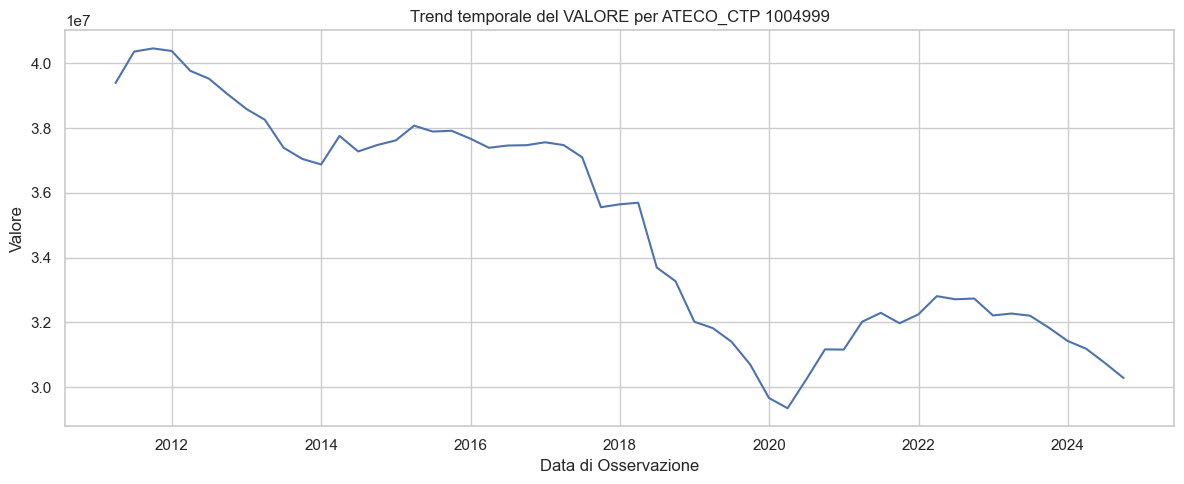

In [48]:
plt.figure(figsize=(12, 5))
plt.plot(data['DATA_OSS'], data['VALORE']) # , marker='o'
plt.xlabel('Data di Osservazione')
plt.ylabel('Valore')
plt.title('Trend temporale del VALORE per ATECO_CTP 1004999')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
data['FENEC'].unique()

array(['52000700'], dtype=object)

In [33]:
data['ATECO_CTP'].unique()

array(['1004999'], dtype=object)

#### provincia della clientela, gruppo dimensionale e sede amministrativa delle banche

In [69]:
tabella = 'TFR20236' 
data = ddb.execute(f"SELECT * FROM {tabella} where DATA_OSS  BETWEEN '{data_da}' AND '{data_a}'  and LOC_CTP IN ({area_str}) order by valore desc").fetchdf()
data['VALORE'] = data['VALORE'].map(lambda x: f"{x:,.0f}")
display(HTML(data.iloc[:, :-1].head(5).to_html(index=False)))

DATA_OSS,DIVISA1,DURORI,ENTE_SEGN,FENEC,LOC_CTP,SET_CTP,VALORE
2023-03-31,1000,9,1070001,52000700,IT,SBI42,"1,747,810,461"
2023-06-30,1000,9,1070001,52000700,IT,SBI42,"1,735,499,267"
2023-12-31,1000,9,1070001,52000700,IT,SBI42,"1,710,491,022"
2023-09-30,1000,9,1070001,52000700,IT,SBI42,"1,705,216,321"
2023-03-31,1000,9,5420010,52000700,IT,SBI42,"1,704,853,363"


#### forma tecnica, area geografica e settore della clientela

In [70]:
tabella = 'TFR20281' 
data = ddb.execute(f"SELECT * FROM {tabella} where DATA_OSS  BETWEEN '{data_da}' AND '{data_a}' and LOC_CTP IN ({area_str}) order by valore desc").fetchdf()
data['VALORE'] = data['VALORE'].map(lambda x: f"{x:,.0f}")
display(HTML(data.iloc[:, :-1].head(5).to_html(index=False)))

DATA_OSS,DESINV,ENTE_SEGN,FENEC,LOC_CTP,SET_CTP,VALORE
2023-03-31,997,1070001,52000700,IT,SBI42,"1,747,810,461"
2023-06-30,997,1070001,52000700,IT,SBI42,"1,735,499,267"
2023-12-31,997,1070001,52000700,IT,SBI42,"1,710,491,022"
2023-09-30,997,1070001,52000700,IT,SBI42,"1,705,216,321"
2023-03-31,997,1070001,5800526,IT,SBI42,"999,918,638"


### Prestiti escluse sofferenze

#### forma tecnica, area geografica e settore della clientela

In [71]:
tabella = 'TDB20226' 
data = ddb.execute(f"SELECT * FROM {tabella} where DATA_OSS  BETWEEN '{data_da}' AND '{data_a}' and LOC_CTP IN ({area_str}) order by valore desc").fetchdf()
data['VALORE'] = data['VALORE'].map(lambda x: f"{x:,.0f}")
display(HTML(data.iloc[:, :-1].head(5).to_html(index=False)))

DATA_OSS,ENTE_SEGN,FENEC,LOC_CTP,SET_CTP,VALORE
2023-01-31,1070001,52000138,IT,SBI42,"1,722,305,717"
2023-02-28,1070001,52000138,IT,SBI42,"1,718,596,750"
2023-03-31,1070001,52000138,IT,SBI42,"1,717,648,810"
2023-05-31,1070001,52000138,IT,SBI42,"1,709,825,994"
2023-04-30,1070001,52000138,IT,SBI42,"1,705,053,973"


### Prestiti (esclusi PCT)

#### Prestiti (esclusi PCT), Depositi (esclusi PCT) e Sportelli

In [72]:
tabella = 'TFR10194' 
data = ddb.execute(f"SELECT * FROM {tabella}  where DATA_OSS  BETWEEN '{data_da}' AND '{data_a}' and PRV_SPORT IN ({area_str})  order by valore desc").fetchdf()
data['VALORE'] = data['VALORE'].map(lambda x: f"{x:,.0f}")
display(HTML(data.iloc[:, :-1].head(5).to_html(index=False)))

DATA_OSS,DIVISA1,DURORI,ENTE_SEGN,FENEC,LOC_SPORT,PRV_SPORT,RESIDENZA1,VALORE
2023-12-31,1000,9,1100010,1041810,9999997,IT,IT,"1,546,906,651"
2023-12-31,1000,9,1100010,1077778,9999997,IT,IT,"1,429,501,870"
2023-12-31,1000,9,1100010,30990009,9999997,IT,IT,"20,158"


#### Prestiti (esclusi PCT) per provincia dello sportello e settore della clientela

In [73]:
tabella = 'TFR10241' 
data = ddb.execute(f"SELECT * FROM {tabella}  where DATA_OSS  BETWEEN '{data_da}' AND '{data_a}'and LOC_SPORT IN ({area_str}) order by valore desc").fetchdf()
data['VALORE'] = data['VALORE'].map(lambda x: f"{x:,.0f}")
display(HTML(data.iloc[:, :-1].head(5).to_html(index=False)))

DATA_OSS,DURORI,ENTE_SEGN,FENEC,LOC_SPORT,RESIDENZA1,SET_CTP,VALORE
2023-06-30,9,1100010,1077778,IT,IT,SBI42,"1,450,247,560"
2023-12-31,9,1100010,1077778,IT,IT,SBI42,"1,427,167,662"
2023-06-30,9,1100010,1077778,IT,IT,S11,"614,277,062"
2023-06-30,9,1100010,1077778,IT,IT,SBI28,"597,732,773"
2023-12-31,9,1100010,1077778,IT,IT,S11,"595,728,944"


#### Prestiti (esclusi PCT) e numero di rapporti per provincia dello sportello

In [74]:
tabella = 'TFR10286' 
data = ddb.execute(f"SELECT * FROM {tabella}  where DATA_OSS  BETWEEN '{data_da}' AND '{data_a}' and LOC_SPORT IN ({area_str}) order by valore desc").fetchdf()
data['VALORE'] = data['VALORE'].map(lambda x: f"{x:,.0f}")
display(HTML(data.iloc[:, :-1].head(5).to_html(index=False)))

DATA_OSS,ENTE_SEGN,FENEC,LOC_SPORT,VALORE
2023-12-31,1100010,1077778,IT,"1,485,058,678"
2023-12-31,1100010,5832508,IT,"57,763,522"
2023-12-31,1100010,5832506,IT,"5,011,026"


#### Prestiti (esclusi PCT) per provincia, settore e attività economica della clientela

In [75]:
tabella = 'TFR10232' 
data = ddb.execute(f"SELECT * FROM {tabella}  where DATA_OSS  BETWEEN '{data_da}' AND '{data_a}' and LOC_CTP IN ({area_str}) order by valore desc").fetchdf()
data['VALORE'] = data['VALORE'].map(lambda x: f"{x:,.0f}")
display(HTML(data.iloc[:, :-1].head(5).to_html(index=False)))

ATECO_CTP,DATA_OSS,ENTE_SEGN,FENEC,LOC_CTP,SET_CTP,VALORE
1005009,2023-03-31,1070001,1077778,IT,SBI42,"1,706,540,568"
1005009,2023-06-30,1070001,1077778,IT,SBI42,"1,691,635,290"
1005009,2023-12-31,1070001,1077778,IT,SBI42,"1,671,780,557"
1005009,2023-09-30,1070001,1077778,IT,SBI42,"1,667,504,028"
1004999,2023-03-31,1070001,1077778,IT,S11,"638,571,733"


## analisi

In [55]:
tabella = 'V_TDB10224_stafinra'
ddb.execute(f"SELECT * FROM {tabella} where LOC_CTP = 'ITF43'").fetchdf()

,DATA_OSS,ENTE_SEGN,SEGNALANTE,LOC_CTP,AREA,SET_CTP,TARGET,FENEC,FENOMENO,ATECO_CTP,ATECO,VALORE
0,2011-06-30,1070001,Banche e Cassa depositi e prestiti,ITF43,Taranto,SBI42,Totale residenti al netto delle Istituzioni fi...,52000139,None,1005009,Totale ateco al netto della sez. U comprese le...,6110596.0
1,2010-06-30,1100010,Banche,ITF43,Taranto,SBI25,Società non finanziarie e famiglie produttrici,52000139,None,1005003,Servizi,1102687.0
2,2011-06-30,1070001,Banche e Cassa depositi e prestiti,ITF43,Taranto,SBI25,Società non finanziarie e famiglie produttrici,52000139,None,1005001,Attività industriali,464174.0
3,2010-06-30,1100010,Banche,ITF43,Taranto,SBI25,Società non finanziarie e famiglie produttrici,52000139,None,F,Costruzioni,318269.0
4,2011-06-30,1070001,Banche e Cassa depositi e prestiti,ITF43,Taranto,SBI25,Società non finanziarie e famiglie produttrici,52000139,None,1004999,Totale ateco al netto della sez. U,2197302.0
...,...,...,...,...,...,...,...,...,...,...,...,...
870,2024-12-31,1070001,Banche e Cassa depositi e prestiti,ITF43,Taranto,SBI25,Società non finanziarie e famiglie produttrici,52000139,None,1004999,Totale ateco al netto della sez. U,2244397.0
871,2024-12-31,1070001,Banche e Cassa depositi e prestiti,ITF43,Taranto,SBI25,Società non finanziarie e famiglie produttrici,52000139,None,F,Costruzioni,198693.0
872,2024-12-31,1070001,Banche e Cassa depositi e prestiti,ITF43,Taranto,SBI25,Società non finanziarie e famiglie produttrici,52000139,None,1005003,Servizi,1357006.0
873,2024-12-31,1070001,Banche e Cassa depositi e prestiti,ITF43,Taranto,SBI25,Società non finanziarie e famiglie produttrici,52000139,None,1005001,Attività industriali,492180.0


In [132]:
data['SEGNALANTE'].unique()

array(['Banche e Cassa depositi e prestiti', 'Banche'], dtype=object)

- SBI25 Società non finanziarie e famiglie produttrici
- SBI33	Società di persone, semplici, di fatto e ditte
- 1100010	Banche
- 1070001	Banche e Cassa depositi e prestiti	

In [53]:
data.sample(3)

ValueError: a must be greater than 0 unless no samples are taken

In [136]:
cluster = ita

df_filtrato = data[
    (data["LOC_CTP"].isin(cluster)) &  # 🔹 Usa il cluster corretto
    (data["DATA_OSS"].isin([pd.Timestamp("2020-12-31"), pd.Timestamp("2021-12-31"), pd.Timestamp("2022-12-31"),
                            pd.Timestamp("2023-12-31"), pd.Timestamp("2024-12-31")])) & 
    (data["ENTE_SEGN"] == "1070001") &  
    (data["SET_CTP"] == "SBI25")  
]

df_filtrato.loc[:, "VALORE"] = (df_filtrato["VALORE"] / 1000).astype(int)
df_filtrato.loc[:, "LOC_CTP"] = pd.Categorical(df_filtrato["LOC_CTP"], categories=cluster, ordered=True)

pivot_df = pd.pivot_table(df_filtrato, index="AREA", columns=["TARGET", "DATA_OSS"], values="VALORE")
area_order = df_filtrato.drop_duplicates("AREA")[["AREA", "LOC_CTP"]].set_index("AREA")["LOC_CTP"]
ordered_areas = area_order[area_order.isin(cluster)].sort_values(
    key=lambda x: x.map({v: i for i, v in enumerate(cluster)})
).index
pivot_df = pivot_df.loc[ordered_areas]
A = pivot_df.iloc[:, 1:].astype(int)

pivot_df_yoy = pivot_df.pct_change(axis=1) * 100
pivot_df_yoy = pivot_df_yoy.iloc[:, 1:]
B = pivot_df_yoy.round(1)

pd.concat([A, B], axis=1)

TARGET                  Società non finanziarie e famiglie produttrici  \
DATA_OSS                                                    2021-12-31   
AREA                                                                     
Italia nord-occidentale                                         135368   
Italia nord-orientale                                            92674   
Italia centrale                                                  70368   
Italia meridionale                                               34425   
Italia insulare                                                  12981   

TARGET                                                               \
DATA_OSS                2022-12-31 2023-12-31 2024-12-31 2021-12-31   
AREA                                                                  
Italia nord-occidentale     131943     125201     122737        2.3   
Italia nord-orientale        93000      86807      81247        0.6   
Italia centrale              67244      64786      63149       -1.2   
Italia meridionale           34876      33683      32382        4.1   
Italia insulare              12864      12341      11895        1.7   

TARGET                                                    
DATA_OSS                2022-12-31 2023-12-31 2024-12-31  
AREA                                                      
Italia nord-occidentale       -2.5       -5.1       -2.0  
Italia nord-orientale          0.4       -6.7       -6.4  
Italia centrale               -4.4       -3.7       -2.5  
Italia meridionale             1.3       -3.4       -3.9  
Italia insulare               -0.9       -4.1       -3.6

In [137]:
A

TARGET                  Società non finanziarie e famiglie produttrici  \
DATA_OSS                                                    2021-12-31   
AREA                                                                     
Italia nord-occidentale                                         135368   
Italia nord-orientale                                            92674   
Italia centrale                                                  70368   
Italia meridionale                                               34425   
Italia insulare                                                  12981   

TARGET                                                    
DATA_OSS                2022-12-31 2023-12-31 2024-12-31  
AREA                                                      
Italia nord-occidentale     131943     125201     122737  
Italia nord-orientale        93000      86807      81247  
Italia centrale              67244      64786      63149  
Italia meridionale           34876      33683      32382  
Italia insulare              12864      12341      11895

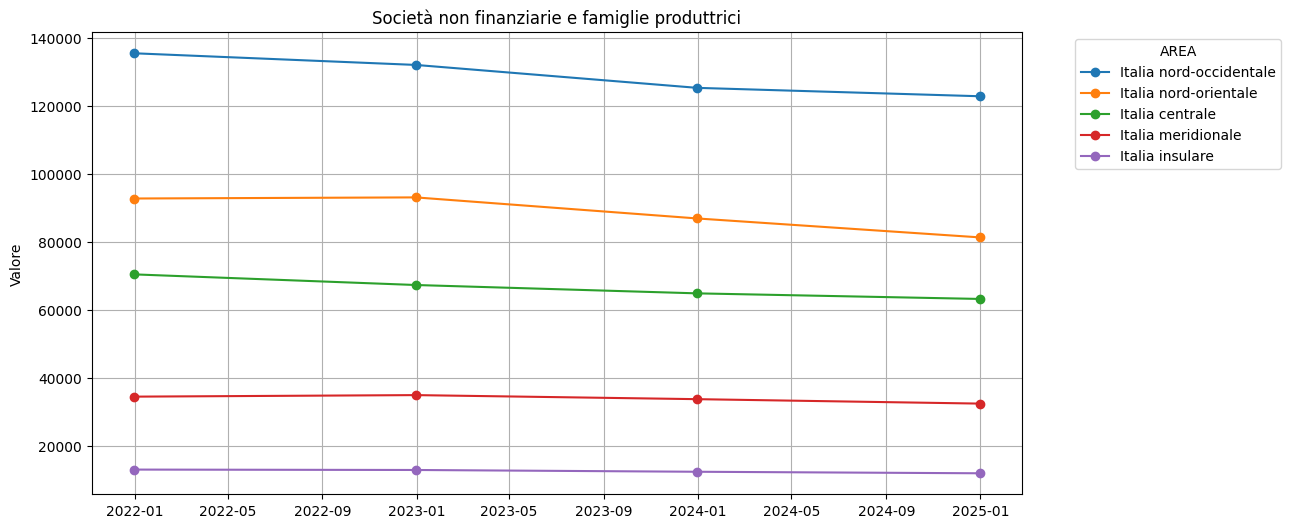

In [138]:
import matplotlib.pyplot as plt

# Verifica che A sia definito
if 'A' in locals():
    # Assicurarsi che i dati siano numerici
    A = A.apply(pd.to_numeric)

    # Convertire le colonne in un livello semplice se sono un MultiIndex
    x_labels = A.columns.get_level_values(-1) if isinstance(A.columns, pd.MultiIndex) else A.columns

    # Creare il grafico lineare (lineplot)
    plt.figure(figsize=(12, 6))

    # Iterare sulle righe di A per tracciare le linee, usando solo i valori del DataFrame
    for index, row in A.iterrows():
        plt.plot(x_labels, row.values, marker='o', label=index)

    # Impostare il titolo con il nome della colonna TARGET se disponibile
    target_name = A.columns.get_level_values(0)[0] if isinstance(A.columns, pd.MultiIndex) else "Valori"
    plt.title(f"{target_name}")

    # Personalizzazione del grafico
    # plt.xlabel("Anno")
    plt.ylabel("Valore")
    plt.legend(title="AREA", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    # plt.xticks(rotation=45)

    # Mostrare il grafico
    plt.show()
else:
    print("❌ La variabile A non è definita. Assicurati di eseguire prima il codice che la genera.")



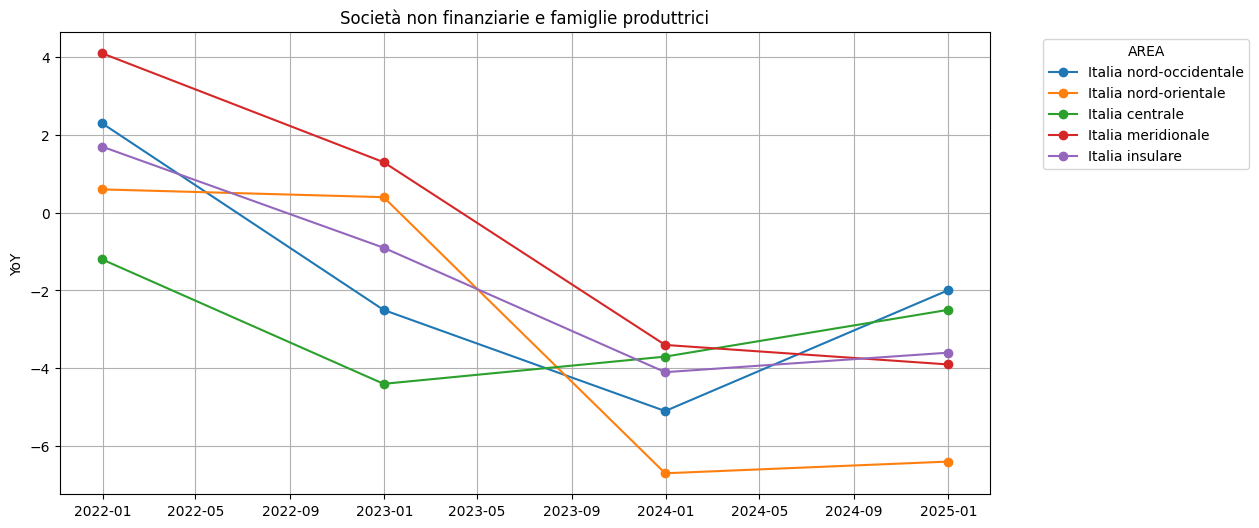

In [139]:
import matplotlib.pyplot as plt

# Verifica che B sia definito
if 'B' in locals():
    # Assicurarsi che i dati siano numerici
    B = B.apply(pd.to_numeric)

    # Convertire le colonne in un livello semplice se sono un MultiIndex
    x_labels = B.columns.get_level_values(-1) if isinstance(B.columns, pd.MultiIndex) else B.columns

    # Creare il grafico lineare (lineplot)
    plt.figure(figsize=(12, 6))

    # Iterare sulle righe di B per tracciare le linee, usando solo i valori del DataFrame
    for index, row in B.iterrows():
        plt.plot(x_labels, row.values, marker='o', label=index)

    # Impostare il titolo con il nome della colonna TARGET se disponibile
    target_name = A.columns.get_level_values(0)[0] if isinstance(A.columns, pd.MultiIndex) else "Valori"
    plt.title(f"{target_name}")

    # Personalizzazione del grafico
    # plt.xlabel("Anno")
    plt.ylabel("YoY")
    plt.legend(title="AREA", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    # plt.xticks(rotation=45)

    # Mostrare il grafico
    plt.show()
else:
    print("❌ La variabile B non è definita. Assicurati di eseguire prima il codice che la genera.")



In [5]:
import pygwalker as pyg
walker = pyg.walk(data)

Box(children=(HTML(value='\n<div id="ifr-pyg-000630ce187537cfw1p7zUxPJjdZrDof" style="height: auto">\n    <hea…